In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
import itertools
import torch

# Business & Data Understanding

Business Understanding:
1. Bertujuan untuk membangun model prediksi diabetes menggunakan Artificial Neural Network (ANN) untuk membantu penyediaan pelayanan kesehatan dalam memprediksi diabates pada pasien.
2. Manfaat dari prediksi diabetes yang akurat dapat membantu dalam upaya pencegahan, pengolahan, dan pengobatan penyakit diabetes, sehingga dapat meningkatkan kuliatas hidup pasien dan mengurangi resiko kematian karena diabetes.
3. Model ini akan digunakan oleh rumah sakit dan klinik kesehatan untuk memberikan layanan yang lebih baik kepada pasien yang beresiko diabetes. Hal ini dapat membantu pasien untuk mengadopsi gaya hidup yang lebih sehat.

Data Understanding: 
1. Sumber data: Pima Indians Diabetes Database
2. Features : Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age	
3. Label : Outcome(Positif/Negatif)
4. Jumlah Data : 768 row, 9 Column
5. Pemeriksaan Awal Data : Data akan diperiksa untuk melihat apakah terdapat missing values, outliers, atau inkompletude dalam data. Data yang tidak lengkap atau anomali akan diatasi.
6. Eksplorasi Data : Eksplorasi awal akan dilakukan untuk memahami distribusi variabel input, korelasi antar variabel, dan pola yang mungkin terkait dengan diabetes.
7. Prapemrosesan Data: Data akan dinormalisasi atau dilakukan prapemrosesan tambahan sesuai dengan kebutuhan model ANN.
8. Persiapan Data: Data akan dibagi menjadi dataset pelatihan (training) dan dataset pengujian (testing) untuk melatih dan menguji model ANN.

Tentang datanya :-
Kumpulan data terdiri dari beberapa variabel prediktor medis (independen) dan satu variabel target (dependen), yaitu Hasil. Variabel independen meliputi jumlah kehamilan yang pernah dialami pasien, BMI, kadar insulin, usia, dan sebagainya.

- Pregnancies : Berapa kali hamil

- Glucose : Konsentrasi glukosa plasma 2 jam dalam tes toleransi glukosa oral

- BloodPressure : Tekanan darah diastolik (mm Hg)

- SkinThickness : Ketebalan lipatan kulit trisep (mm)

- Insulin : Insulin serum 2 jam (mu U/ml)

- BMI : Indeks massa tubuh (berat badan dalam kg/(tinggi badan dalam m)^2)

- DiabetesPedigreeFunction : Fungsi silsilah diabetes (Bila diberikan beberapa data mengenai riwayat diabetes melitus pada kerabat dan hubungan genetik dari kerabat tersebut dengan pasien. Fungsi silsilah diabetes adalah ukuran pengaruh genetik yang memberikan gambaran risiko herediter yang mungkin dimiliki seseorang dengan timbulnya penyakit tersebut. diabetes mellitus.)

- Age : Usia (tahun)

- Outcome : Variabel kelas (0 atau 1) 268 dari 768 adalah 1, yang lainnya adalah 0

# Data Cleaning and Analysis

In [118]:
df = pd.read_csv('./datasets/diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [119]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [121]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Explory Data Analysis

Dalam statistik, analisis data eksplorasi adalah pendekatan menganalisis kumpulan data untuk merangkum karakteristik utamanya, seringkali dengan metode visual. Model statistik dapat digunakan atau tidak, tetapi tujuan utama EDA adalah untuk melihat apa yang dapat disampaikan oleh data kepada kita di luar tugas pemodelan formal atau pengujian hipotesis.

Analisis data eksplorasi mendorong ahli statistik untuk mengeksplorasi data, dan mungkin merumuskan hipotesis yang dapat mengarah pada pengumpulan dan eksperimen data baru. EDA berbeda dengan analisis data awal, yang berfokus lebih sempit pada pemeriksaan asumsi yang diperlukan untuk pemasangan model dan pengujian hipotesis, serta menangani nilai yang hilang dan melakukan transformasi variabel sesuai kebutuhan.

c:\Users\Hammam\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hammam\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hammam\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hammam\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ham

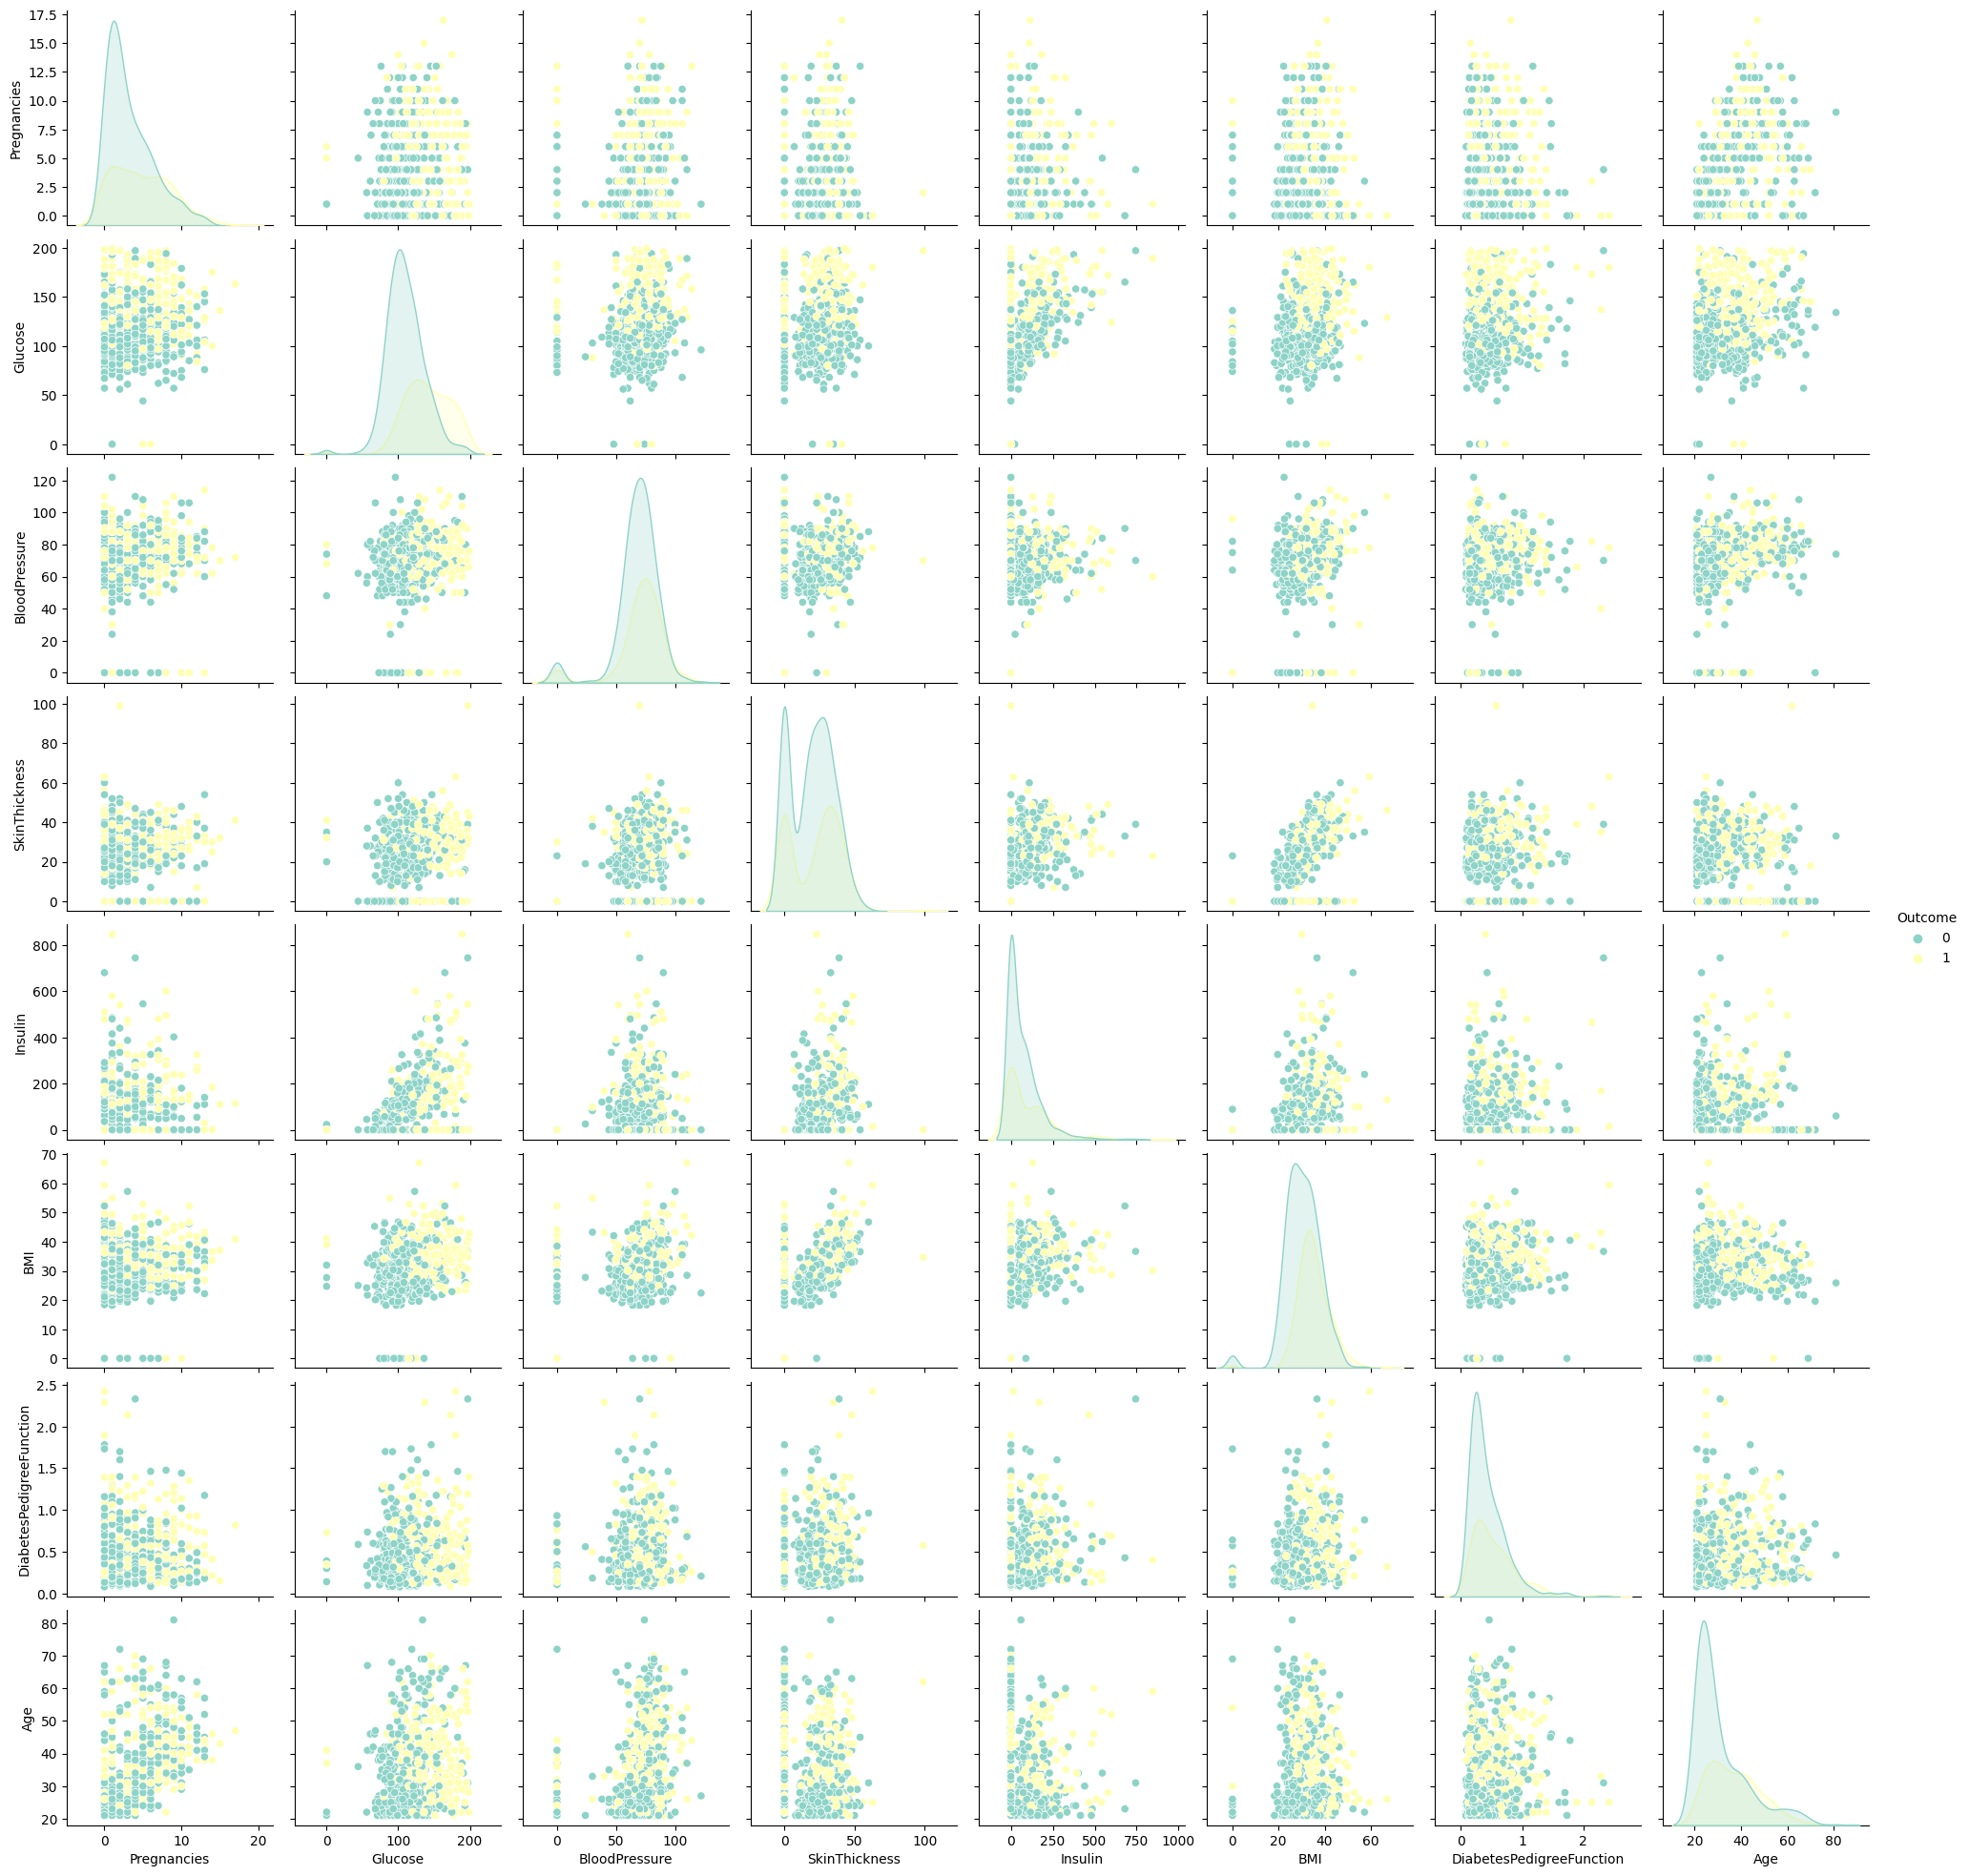

In [122]:
sns.pairplot(df, hue='Outcome', palette='Set3')

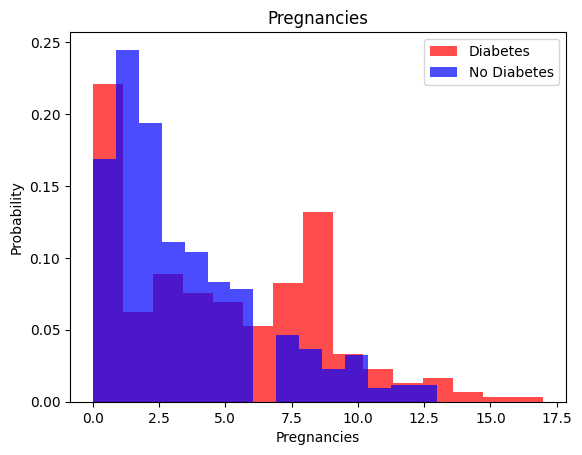

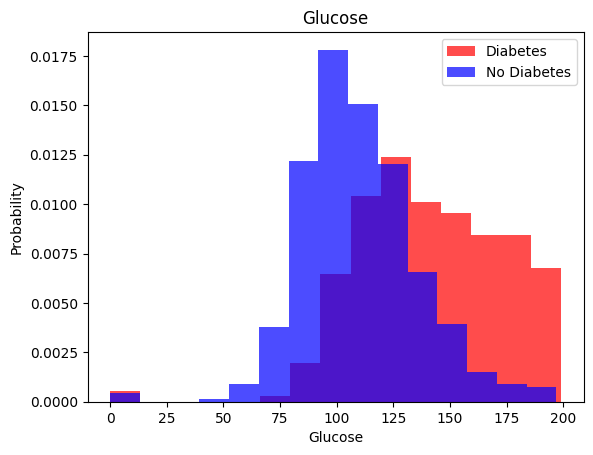

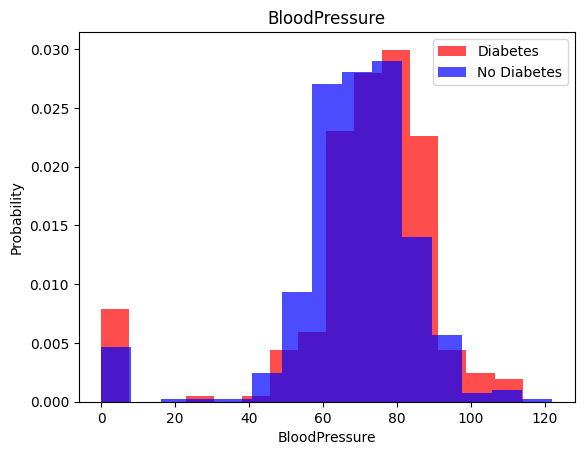

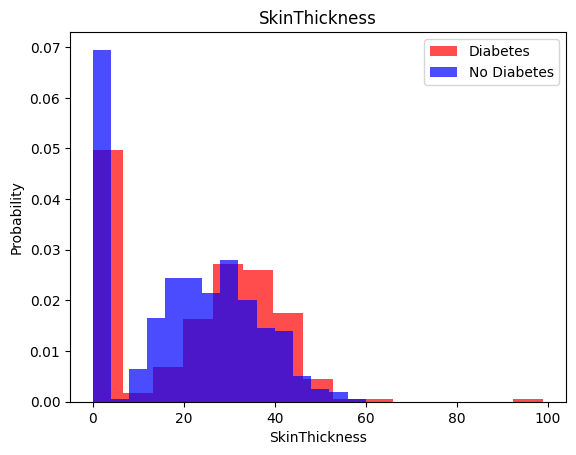

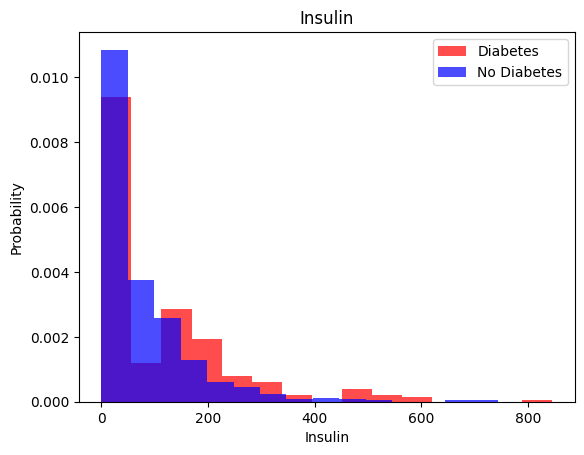

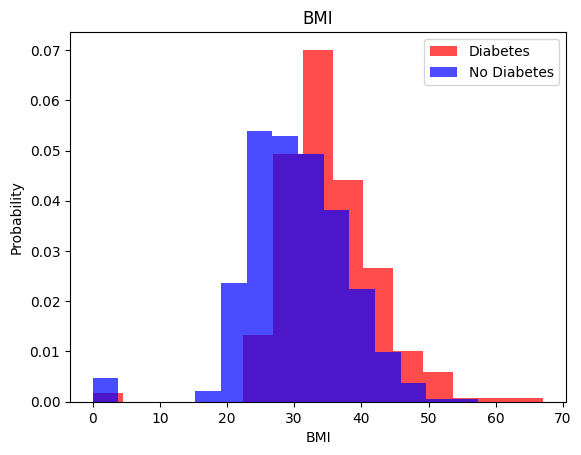

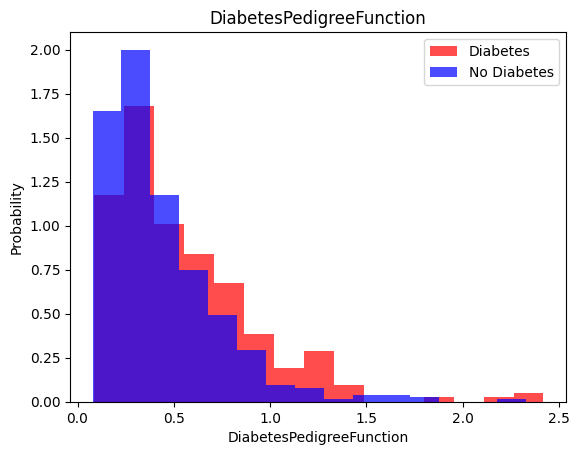

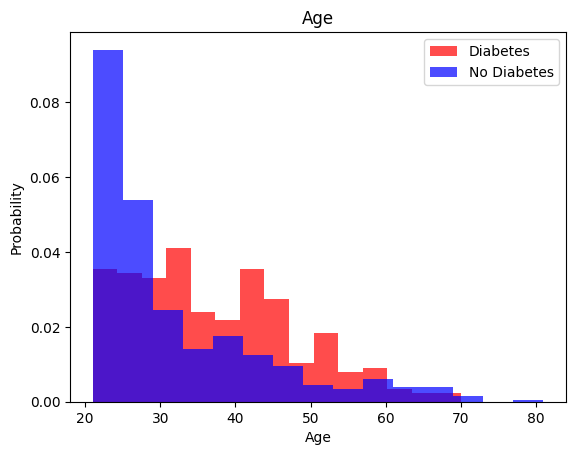

In [123]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(
        df[df['Outcome'] == 1][label],
        color='red',
        label='Diabetes',
        alpha=0.7,
        density=True,
        bins=15
    )

    plt.hist(
        df[df['Outcome'] == 0][label],
        color='blue',
        label='No Diabetes',
        alpha=0.7,
        density=True,
        bins=15
    )

    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

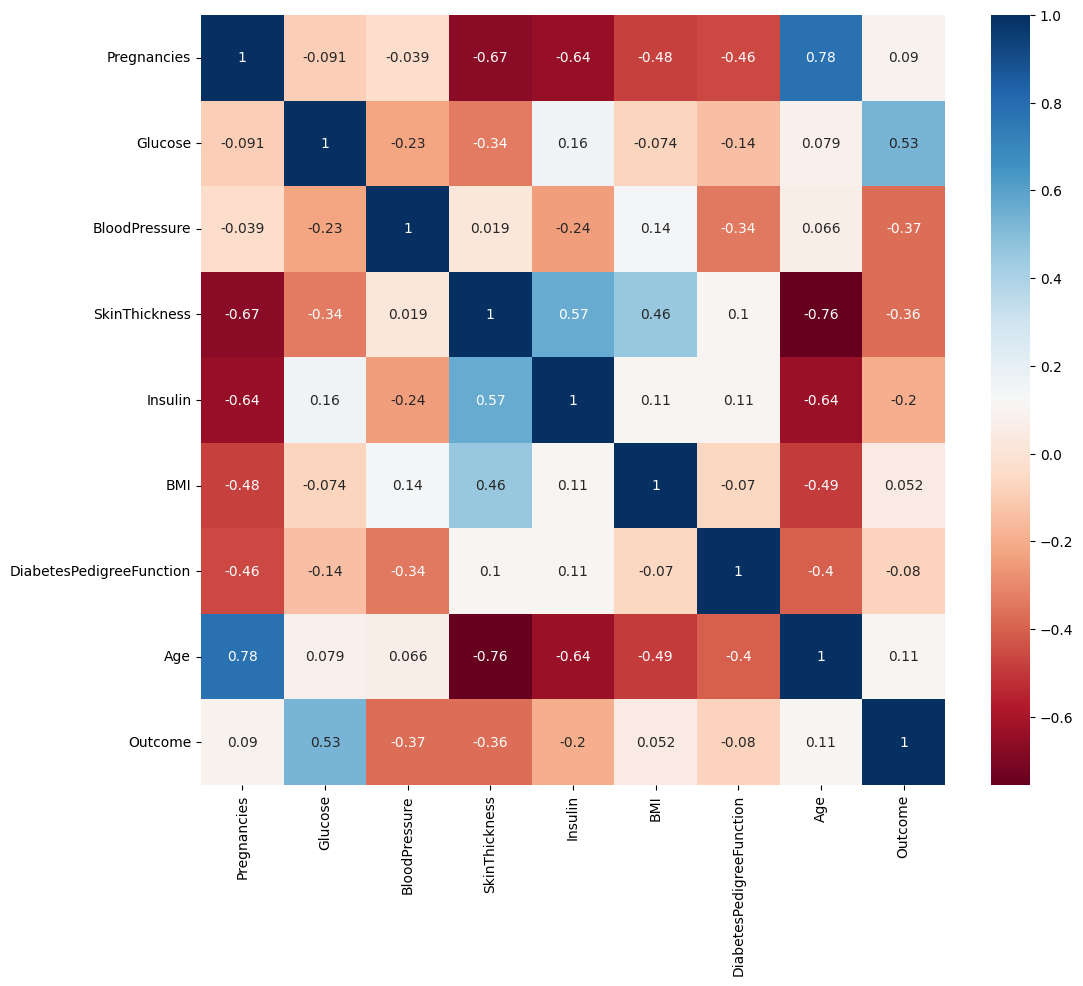

In [124]:
plt.figure(figsize=(12,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix.corr(), annot=True,cmap ='RdBu')
plt.show()

## Splitting the Data Set

Membagi kumpulan data menjadi dua subset:

- Train Set — Subset untuk melatih model.
- Test set — Subset untuk menguji model yang dilatih.

Dengan asumsi bahwa set pengujian Anda memenuhi dua kondisi sebelumnya, tujuan Anda adalah membuat model yang dapat digeneralisasikan dengan baik pada data baru. Set pengujian kami berfungsi sebagai proksi untuk data baru.

Kita akan menggunakan fungsi train_test_split sklearn untuk menghasilkan kumpulan data pelatihan, yang berisi sebagian besar total data, dan kemudian kumpulan data pengujian, yang berisi lebih sedikit data total.

In [125]:
y = df['Outcome']
X = df.drop(columns=['Outcome'])
# Drop feature yang memiliki korelasi dibawah 0.2
X2 = X.drop(columns=['BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction'])

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [127]:
import torch.nn as nn
import torch.nn.functional as F

In [128]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_text = torch.FloatTensor(y_test)

In [129]:
df.shape

(768, 9)

## Make Artificial Neural Network

In [130]:
class ANN_model(nn.Module):
    def __init__(self, input_features=8, hidden1=20, hidden2=20, out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features, hidden1)
        self.f_connected2=nn.Linear(hidden1, hidden2)
        self.out=nn.Linear(hidden2, out_features)
    def forward(self, x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [131]:
torch.manual_seed(20)
model = ANN_model()

In [132]:
model.parameters

<bound method Module.parameters of ANN_model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [133]:

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


## Train Artificial Neural Network Model

In [134]:
epochs = 500
final_losses = []
for i in range(epochs):
    i=i+1
    # y_pred = model.forward(X_train)
    # y_train = y_train.type(torch.LongTensor)
    y_pred = model(X_train)
    y_train = y_train.squeeze().type(torch.LongTensor)
    loss = loss_function(y_pred, y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch Number: {} and the loss : {}".format(i, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch Number: 1 and the loss : 3.484623432159424
Epoch Number: 11 and the loss : 0.7938545346260071
Epoch Number: 21 and the loss : 0.5898013114929199
Epoch Number: 31 and the loss : 0.587310791015625
Epoch Number: 41 and the loss : 0.5660378336906433
Epoch Number: 51 and the loss : 0.5534462928771973
Epoch Number: 61 and the loss : 0.5436716079711914
Epoch Number: 71 and the loss : 0.5346787571907043
Epoch Number: 81 and the loss : 0.526517927646637
Epoch Number: 91 and the loss : 0.5194432735443115
Epoch Number: 101 and the loss : 0.5132220983505249
Epoch Number: 111 and the loss : 0.5072236657142639
Epoch Number: 121 and the loss : 0.5014553070068359
Epoch Number: 131 and the loss : 0.4954076409339905
Epoch Number: 141 and the loss : 0.4889429807662964
Epoch Number: 151 and the loss : 0.4813247323036194
Epoch Number: 161 and the loss : 0.4738500416278839
Epoch Number: 171 and the loss : 0.4673078954219818
Epoch Number: 181 and the loss : 0.4612797498703003
Epoch Number: 191 and the 

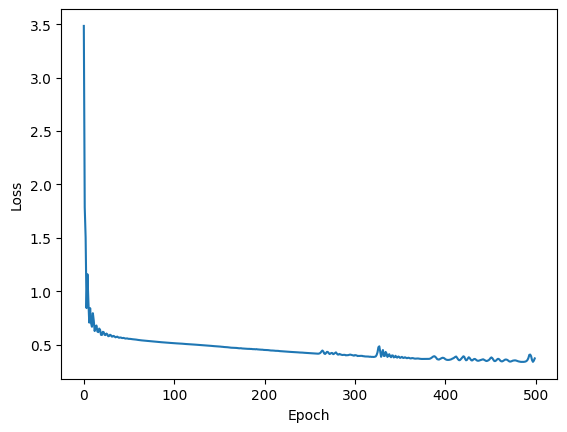

In [135]:
plt.plot(range(epochs), [loss.item() for loss in final_losses])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [136]:
predictions = []
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
0
1
1
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
1
0
0
1
1
0
1
0
0
1
0
0
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
0
1
1
0
1
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
1
0
1
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
0
0
0
1
1
0
0
0
1
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0


### Model Evalaute

In [137]:
cm = confusion_matrix(y_test, predictions)
cm

array([[108,  15],
       [ 42,  27]], dtype=int64)

In [138]:
def show_confusion_matrix(ytest, ypred):
    figsize = (10, 10)

    # Create the confusion matrix
    cm = confusion_matrix(ytest, tf.round(ypred))
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues) 
    fig.colorbar(cax)

    # Create classes
    classes = False

    if classes:
      labels = classes
    else:
      labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
          xlabel="Predicted label",
          ylabel="True label",
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.title.set_size(20)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=15)

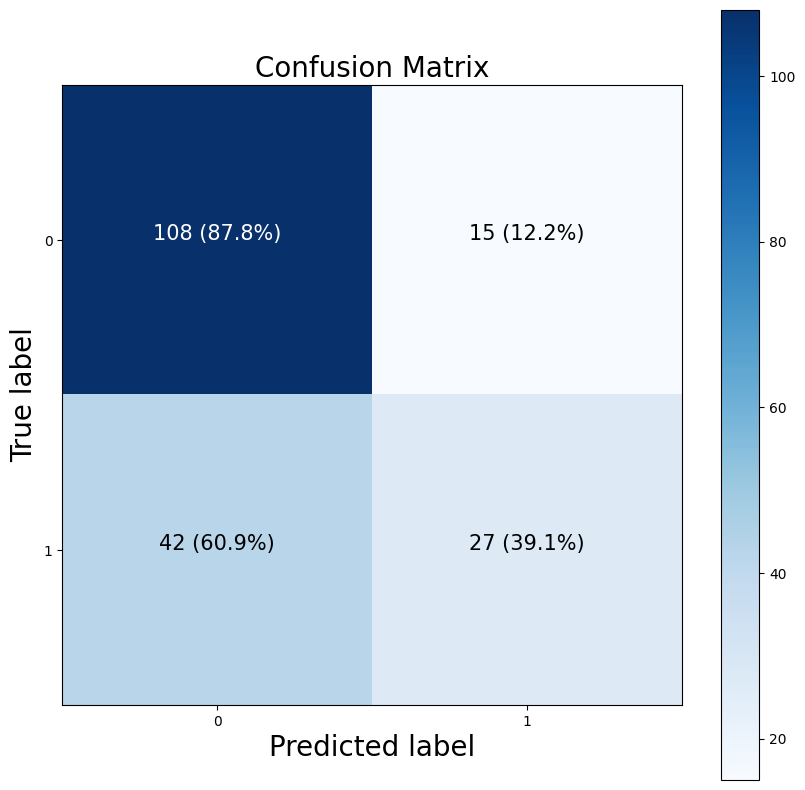

In [139]:
show_confusion_matrix(y_test, predictions)

In [140]:
score = accuracy_score(y_test, predictions)
score

0.703125

In [141]:
model.eval()

ANN_model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [142]:
list(df.iloc[0, :-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [143]:
lst1=[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [144]:
new_data = torch.tensor(lst1)

In [145]:
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([2.1061, 2.4507])
1


In [146]:
new_data

tensor([  6.0000, 148.0000,  72.0000,  35.0000,   0.0000,  33.6000,   0.6270,
         50.0000])

### Split Data Yang memiliki Korelasi diatas 0.2

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.25, random_state=42)

# Train Model with Keras

In [148]:
tf.random.set_seed(42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

normalize = tf.keras.layers.Normalization()
normalize.adapt(X_train)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(20, activation='elu'),
    tf.keras.layers.Dense(20, activation='elu'),
    tf.keras.layers.Dense(1, activation="sigmoid") 
])

model.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=['accuracy'])

# Fit the model
class_weight = {0: 1, 1: 0.8}
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/100
36/36 [==============================] - 3s 18ms/step - loss: 0.5245 - accuracy: 0.7205 - val_loss: 0.5522 - val_accuracy: 0.7240
Epoch 2/100
36/36 [==============================] - 0s 5ms/step - loss: 0.4684 - accuracy: 0.7587 - val_loss: 0.5647 - val_accuracy: 0.7083
Epoch 3/100
36/36 [==============================] - 0s 5ms/step - loss: 0.4674 - accuracy: 0.7726 - val_loss: 0.5513 - val_accuracy: 0.7135
Epoch 4/100
36/36 [==============================] - 0s 5ms/step - loss: 0.4653 - accuracy: 0.7743 - val_loss: 0.5592 - val_accuracy: 0.7083
Epoch 5/100
36/36 [==============================] - 0s 5ms/step - loss: 0.4609 - accuracy: 0.7830 - val_loss: 0.5641 - val_accuracy: 0.7188
Epoch 6/100
36/36 [==============================] - 0s 5ms/step - loss: 0.4568 - accuracy: 0.7847 - val_loss: 0.5432 - val_accuracy: 0.7292
Epoch 7/100
36/36 [==============================] - 0s 5ms/step - loss: 0.4531 - accuracy: 0.7847 - val_loss: 0.5494 - val_accuracy: 0.7135
Epoch 8/100


## Model Evaluates

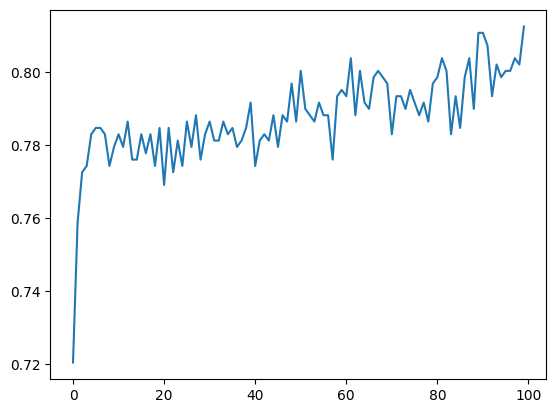

In [149]:
acc = history.history
plt.plot(acc['accuracy'])

In [150]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

6/6 [==============================] - 1s 4ms/step - loss: 0.5822 - accuracy: 0.7344
Model loss on test set: 0.5821645259857178
Model accuracy on test set: 73.44%


6/6 [==============================] - 0s 3ms/step


array([[90, 33],
       [18, 51]], dtype=int64)

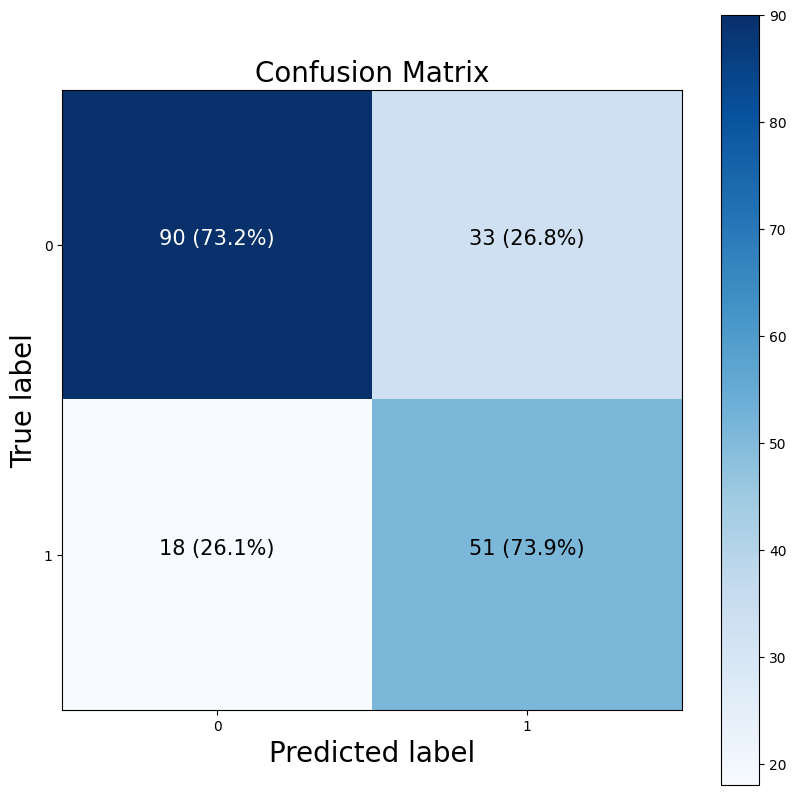

In [151]:
# Make predictions
y_preds = model.predict(X_test)

display(confusion_matrix(y_test, tf.round(y_preds)))
# Create confusion matrix
show_confusion_matrix(y_test, y_preds)

# Train Model Machine Learning LGBM

In [152]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          eval_metric='logloss')

[LightGBM] [Info] Number of positive: 199, number of negative: 377
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 289
[LightGBM] [Info] Number of data points in the train set: 576, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345486 -> initscore=-0.638940
[LightGBM] [Info] Start training from score -0.638940
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [153]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.9826
Testing accuracy 0.7083


array([[93, 30],
       [26, 43]], dtype=int64)

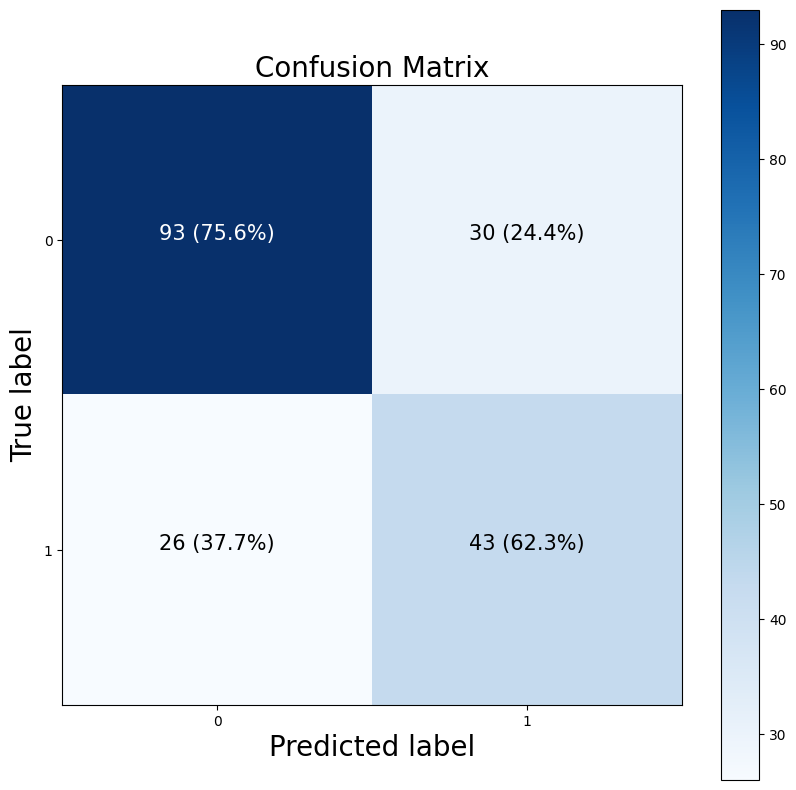

In [154]:
y_preds = model.predict(X_test)

display(confusion_matrix(y_test, tf.round(y_preds)))
# Create confusion matrix
show_confusion_matrix(y_test, y_preds)

In [155]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [156]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

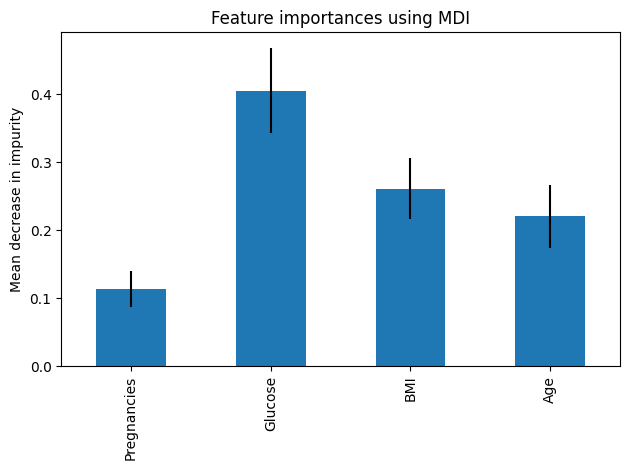

In [157]:
feature_names = X2.columns
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()